In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [ ]:
!pip install opencv-python

In [ ]:
import os
import cv2
import shutil

In [ ]:
# Set the paths to your fake and real image folders
fake_folder = '/content/drive/MyDrive/Augm'
real_folder = '/content/drive/MyDrive/Instagram_photos'

# Create a new folder to save labeled images
labeled_folder = '/content/drive/MyDrive/Labelled_images'
os.makedirs(labeled_folder, exist_ok=True)

# Function to label and save images
def label_and_save_images(folder, label):
    for filename in os.listdir(folder):
        image_path = os.path.join(folder, filename)
        img = cv2.imread(image_path)

        # Add a label to the image (0 for fake, 1 for real)
        labeled_img = cv2.putText(img, f'Label: {label}', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

        # Save the labeled image to the new folder
        labeled_path = os.path.join(labeled_folder, f'label_{label}_{filename}')
        cv2.imwrite(labeled_path, labeled_img)

# Label fake images (label 0)
label_and_save_images(fake_folder, label=0)

# Label real images (label 1)
label_and_save_images(real_folder, label=1)


In [ ]:

def label_and_save_images(input_folder, output_folder, label):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    for filename in os.listdir(input_folder):
        if filename.endswith(".jpg") or filename.endswith(".png"):  # Adjust the file extensions as needed
            input_path = os.path.join(input_folder, filename)
            output_filename = f"label_{label}_{len(os.listdir(output_folder)) + 1}.jpg"  # You can use any desired extension
            output_path = os.path.join(output_folder, output_filename)

            image = cv2.imread(input_path)

            # Resize or preprocess the image as needed
            # image = cv2.resize(image, (width, height))

            # Save the image with the new label and filename format
            cv2.imwrite(output_path, image)

# Paths to your fake and real image folders
fake_folder_path = "/content/drive/MyDrive/Augm"
real_folder_path = "/content/drive/MyDrive/Instagram_photos"

# Output folder for combined and labeled images
combined_folder_path = "/content/drive/MyDrive/labelled"

# Label and save fake images
label_and_save_images(fake_folder_path, combined_folder_path, label=0)

# Label and save real images
label_and_save_images(real_folder_path, combined_folder_path, label=1)


In [ ]:
pip install opencv-python tqdm


In [ ]:
import os
import cv2
import numpy as np
from tqdm import tqdm

In [ ]:

def save_labeled_images(src_folder, dest_folder, label):
    os.makedirs(dest_folder, exist_ok=True)

    image_files = os.listdir(src_folder)
    for img_file in tqdm(image_files, desc=f"Processing {label} images"):
        img_path = os.path.join(src_folder, img_file)
        img = cv2.imread(img_path)

        # Assuming you want to resize the images to a specific size
        img = cv2.resize(img, (224, 224))  # Adjust the size as needed

        # Save the image with the format real<1>.jpg or fake<0>.jpg
        dest_filename = f"{label}.jpg"
        dest_path = os.path.join(dest_folder, dest_filename)
        cv2.imwrite(dest_path, img)

# Assuming you have two folders, 'fake_images' and 'real_images'
fake_images_folder = '/content/drive/MyDrive/Augm'
real_images_folder = '/content/drive/MyDrive/Instagram_photos'

# Specify the destination folder for the labeled images
destination_folder = '/content/drive/MyDrive/new_label'

# Save fake images with label 0
save_labeled_images(fake_images_folder, destination_folder, label=0)

# Save real images with label 1
save_labeled_images(real_images_folder, destination_folder, label=1)


Processing 1 images: 100%|██████████| 547/547 [00:39<00:00, 14.01it/s]


In [ ]:
import os
import cv2

def label_and_save_images(input_folder, output_folder, label):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    label_prefix = "real" if label == 1 else "fake"
    label_count = len(os.listdir(output_folder))

    for filename in os.listdir(input_folder):
        if filename.endswith(".jpg") or filename.endswith(".png") or filename.endswith(".jpeg"):  # Adjust the file extensions as needed
            input_path = os.path.join(input_folder, filename)
            output_filename = f"{label_prefix}{label_count}.jpg"
            output_path = os.path.join(output_folder, output_filename)

            image = cv2.imread(input_path)

            # Resize or preprocess the image as needed
            # image = cv2.resize(image, (width, height))

            # Save the image with the new label and filename format
            cv2.imwrite(output_path, image)
            label_count += 1

# Paths to your fake and real image folders
fake_folder_path = "/content/drive/MyDrive/fake_aug"
real_folder_path = "/content/drive/MyDrive/Real_augm"

# Output folder for combined and labeled images
combined_folder_path = "/content/drive/MyDrive/Labelled_Images"

# Label and save fake images
label_and_save_images(fake_folder_path, combined_folder_path, label=0)

# Label and save real images
label_and_save_images(real_folder_path, combined_folder_path, label=1)


In [ ]:
import os
import cv2

def label_and_save_images(input_folder, output_folder, label, label_prefix):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    label_count = len(os.listdir(output_folder))

    for filename in os.listdir(input_folder):
        if filename.endswith(".jpg") or filename.endswith(".png"):  # Adjust the file extensions as needed
            input_path = os.path.join(input_folder, filename)
            output_filename = f"{label_prefix}{label_count}.jpg"
            output_path = os.path.join(output_folder, output_filename)

            image = cv2.imread(input_path)

            # Resize or preprocess the image as needed
            # image = cv2.resize(image, (width, height))

            # Save the image with the new label and filename format
            cv2.imwrite(output_path, image)
            label_count += 1

# Paths to your fake and real image folders
fake_folder_path = "/content/drive/MyDrive/Augm"
real_folder_path = "/content/drive/MyDrive/Instagram_photos"

# Output folder for combined and labeled images
combined_folder_path = "/content/drive/MyDrive/labelled_images"

# Label and save fake images
label_and_save_images(fake_folder_path, combined_folder_path, label=0, label_prefix="fake")

# Label and save real images
label_and_save_images(real_folder_path, combined_folder_path, label=1, label_prefix="real")


In [ ]:
import os
import cv2

def label_and_save_images(input_folder, output_folder, label, label_prefix):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    label_count = len(os.listdir(output_folder))

    for filename in os.listdir(input_folder):
        if filename.endswith(".jpeg") or filename.endswith(".png"):  # Adjust the file extensions as needed
            input_path = os.path.join(input_folder, filename)
            output_filename = f"{label_prefix}{label_count}.jpg"
            output_path = os.path.join(output_folder, output_filename)

            image = cv2.imread(input_path)

            # Resize or preprocess the image as needed
            # image = cv2.resize(image, (width, height))

            # Save the image with the new label and filename format
            cv2.imwrite(output_path, image)
            label_count += 1

# Paths to your fake and real image folders
Real_folder_path = "/content/drive/MyDrive/Real_augm"

# Output folder for combined and labeled images
combined_folder_path = "/content/drive/MyDrive/Labelled_Images"

# Label and save fake images
label_and_save_images(Real_folder_path, combined_folder_path, label=0, label_prefix="Real")


'/'

In [ ]:
import os
import cv2
import numpy as np
import shutil

def copy_resize_and_convert_images(source_folder, destination_folder, label, target_size=(255, 255)):
    if not os.path.exists(destination_folder):
        os.makedirs(destination_folder)

    images = []
    image_count = 0
    for filename in os.listdir(source_folder):
        if filename.lower().endswith(('.jpg', '.png','.jpeg')):
            source_path = os.path.join(source_folder, filename)
            destination_filename = f"{label}{image_count}.jpg"
            destination_path = os.path.join(destination_folder, destination_filename)

            # Read and resize the image
            image = cv2.imread(source_path)
            resized_image = cv2.resize(image, target_size)

            # Save the resized image
            cv2.imwrite(destination_path, resized_image)

            # Convert to numpy array and add to the list
            image_array = np.asarray(resized_image)
            images.append(image_array)

            image_count += 1

    return np.array(images)

# Example usage for fake images
fake_images_folder = "/content/drive/MyDrive/Augm"
destination_folder = "/content/drive/MyDrive/Label_images_folder"
fake_images = copy_resize_and_convert_images(fake_images_folder, destination_folder, label="fake")

# Example usage for real images
real_images_folder = "/content/drive/MyDrive/Instagram_photos"
real_images = copy_resize_and_convert_images(real_images_folder, destination_folder, label="real")


In [ ]:
len(destination_folder)

42

In [ ]:
type(destination_folder)

str

In [ ]:
combined_images = np.concatenate((fake_images, real_images), axis=0)


In [ ]:
type(combined_images)

numpy.ndarray

In [ ]:
combined_images.size

535480875

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
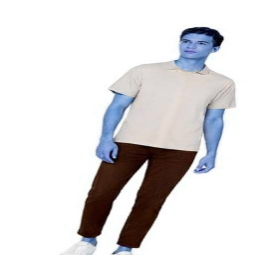

In [ ]:
combined_images[0]

In [ ]:
files_list = os.listdir("/content/drive/MyDrive/Labelled_Images")

# Count the number of files
num_files = len(files_list)


In [ ]:
print(num_files)

3614


In [ ]:
import os, shutil, pathlib

original_dir = pathlib.Path(r"/content/drive/MyDrive/Labelled_Images") # get the path of train folder in cats_dogs_images using copypath and paste the link here
new_base_dir = pathlib.Path(r"/content/drive/MyDrive/Image_segregated_2") # create a new folder, rename it and get the path using copypath and paste the link here.


# define a function to create subsets for train, test and validation
def make_subset(subset_name, start_index, end_index):
    for category in ("fake"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

# calling the function thrice to create 3 subsets.
make_subset("train", start_index=0, end_index=1200)
make_subset("validation", start_index=1200, end_index=1700)
make_subset("test", start_index=1700, end_index=2745)

In [ ]:
/content/drive/MyDrive/Labelled_Images/fake0.jpg

In [ ]:
!pip install pathlib

In [ ]:
import os, shutil, pathlib

In [ ]:

original_dir = pathlib.Path(r"/content/drive/MyDrive/Labelled_Images") # get the path of train folder in cats_dogs_images using copypath and paste the link here
new_base_dir = pathlib.Path(r"/content/drive/MyDrive/Image_segregated_2") # create a new folder, rename it and get the path using copypath and paste the link here.


In [ ]:
def make_subset(subset_name, start_index, end_index):
    for category in ("Real","Fake"):
        dir = new_base_dir / subset_name
        os.makedirs(dir, exist_ok=True)
        fnames = [f"{category}{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

In [ ]:
# calling the function thrice to create 3 subsets.
make_subset("train", start_index=379, end_index=1379)

In [ ]:
make_subset("validation", start_index=1000, end_index=1400)


In [ ]:
make_subset("test", start_index=1781, end_index=2174)

In [ ]:
## This step helps in converting all the images present in folder to same shape.
import cv2
import numpy as np
labels = ['Real','fake']
img_size = 224
def get_data(data_dir):
    data = []
    for label in labels:
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (224, 224)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Image_segregated_2/train/Real'

In [ ]:
import os
import cv2

def resize_images(folder_path, output_folder, target_shape=(224, 224)):
    os.makedirs(output_folder, exist_ok=True)

    for filename in os.listdir(folder_path):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            img_path = os.path.join(folder_path, filename)
            img = cv2.imread(img_path)
            resized_img = cv2.resize(img, target_shape)

            output_path = os.path.join(output_folder, filename)
            cv2.imwrite(output_path, resized_img)

# Example usage
base_folder = "/content/drive/MyDrive/Image_segregated_2"
train_folder = os.path.join(base_folder, "train")
test_folder = os.path.join(base_folder, "test")
val_folder = os.path.join(base_folder, "validation")

resized_train_folder = os.path.join(base_folder, "resized_train")
resized_test_folder = os.path.join(base_folder, "resized_test")
resized_val_folder = os.path.join(base_folder, "resized_validation")

resize_images(train_folder, resized_train_folder)
resize_images(test_folder, resized_test_folder)
resize_images(val_folder, resized_val_folder)


In [ ]:
train = ('/content/drive/MyDrive/Image_segregated_2/train')
val = ('/content/drive/MyDrive/Image_segregated_2/val')

In [ ]:
x_train = []
y_train = []
x_val = []
y_val = []

for feature, label in train:
  x_train.append(feature)
  y_train.append(label)

for feature, label in val:
  x_val.append(feature)
  y_val.append(label)

# Normalize the data
x_train = np.array(x_train).astype('float32') / 255
x_val = np.array(x_val).astype('float32') / 255



ValueError: not enough values to unpack (expected 2, got 1)

In [ ]:
import os
import cv2
import numpy as np

def load_images_and_labels(folder_path):
    images = []
    labels = []

    for filename in os.listdir(folder_path):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            img_path = os.path.join(folder_path, filename)
            img = cv2.imread(img_path)

            # Resize or preprocess the image as needed
            # img = cv2.resize(img, (width, height))

            label = int(filename.startswith("fake"))  # Assuming "fake" corresponds to label 0, adjust accordingly
            images.append(img)
            labels.append(label)

    return np.array(images), np.array(labels)

# Example usage
train_folder = "/content/drive/MyDrive/deep_fake_image_detection/Image_segregated_2/train"
X_train, y_train = load_images_and_labels(train_folder)

# Now you have X_train (images) and y_train (labels) ready to use


In [ ]:
X_train.shape

(1999, 224, 224, 3)

In [ ]:
y_train.shape

(1999,)

In [ ]:
type(X_train)

numpy.ndarray

In [ ]:
len(X_train)

1999

In [ ]:
# Example usage
val_folder = "/content/drive/MyDrive/deep_fake_image_detection/Image_segregated_2/val"
X_val, y_val = load_images_and_labels(val_folder)


In [ ]:
X_val.shape

(810, 224, 224, 3)

In [ ]:
y_val.shape

(810,)

In [ ]:
type(y_val)

numpy.ndarray

In [ ]:
test_folder = "/content/drive/MyDrive/deep_fake_image_detection/Image_segregated_2/test"
X_test, y_test = load_images_and_labels(test_folder)


In [ ]:
X_test.shape

(819, 224, 224, 3)

In [ ]:
y_test.shape

(819,)

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

from sklearn.metrics import classification_report,confusion_matrix

import tensorflow as tf

import cv2
import os

import numpy as np

## Generating data or images during runtime for training purpose.DO not do it for testing
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)


In [ ]:
X_train.shape

(1999, 224, 224, 3)

In [ ]:
from keras.applications import ResNet50
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.optimizers import Adam



In [ ]:
# Load pre-trained ResNet50 model (excluding the top layer)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))



94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Create a new model and add the pre-trained ResNet50 as a base
model = Sequential()


model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Assuming binary classification (real/fake)

# Compile the model
model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])



In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten_2 (Flatten)         (None, 100352)            0         
                                                                 
 dense_4 (Dense)             (None, 256)               25690368  
                                                                 
 dense_5 (Dense)             (None, 1)                 257       
                                                                 
Total params: 49278337 (187.98 MB)
Trainable params: 25690625 (98.00 MB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [ ]:
# You need to have your dataset in X_train and y_train (features and labels)
model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))


In [ ]:
model = Sequential()
model.add(Conv2D(32,3,padding="same", activation="relu", input_shape=(224,224,3)))
model.add(MaxPool2D())

model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Conv2D(128, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Conv2D(128, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Conv2D(256, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Conv2D(256, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dropout(0.2))

model.add(Dense(128,activation="relu"))
model.add(Dense(1, activation="sigmoid"))



In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 28, 28, 64)        0

In [ ]:
#tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
opt = Adam(learning_rate=0.000001)
model.compile(optimizer = opt , loss = "binary_crossentropy" , metrics = ['accuracy'])

In [ ]:
y_train = np.array(y_train)
y_val = np.array(y_val)

In [ ]:
#history = model.fit(x_train,y_train,epochs = 10 , validation_data = (x_val, y_val))


from keras.callbacks import ModelCheckpoint

# train the model
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, save_best_only=True)

hist = model.fit(X_train, y_train, batch_size=16, epochs=30,
          validation_data=(X_val, y_val), callbacks=[checkpointer],
          verbose=2, shuffle=True)

Epoch 1/30

Epoch 1: val_loss improved from inf to 1.00316, saving model to model.weights.best.hdf5
125/125 - 193s - loss: 2.9300 - accuracy: 0.5038 - val_loss: 1.0032 - val_accuracy: 0.5200 - 193s/epoch - 2s/step
Epoch 2/30


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_loss improved from 1.00316 to 0.66601, saving model to model.weights.best.hdf5
125/125 - 188s - loss: 2.3218 - accuracy: 0.5058 - val_loss: 0.6660 - val_accuracy: 0.5925 - 188s/epoch - 2s/step
Epoch 3/30

Epoch 3: val_loss improved from 0.66601 to 0.60442, saving model to model.weights.best.hdf5
125/125 - 187s - loss: 1.7977 - accuracy: 0.5448 - val_loss: 0.6044 - val_accuracy: 0.6413 - 187s/epoch - 1s/step
Epoch 4/30

Epoch 4: val_loss improved from 0.60442 to 0.53730, saving model to model.weights.best.hdf5
125/125 - 185s - loss: 1.6979 - accuracy: 0.5518 - val_loss: 0.5373 - val_accuracy: 0.7125 - 185s/epoch - 1s/step
Epoch 5/30

Epoch 5: val_loss improved from 0.53730 to 0.43004, saving model to model.weights.best.hdf5
125/125 - 188s - loss: 1.3580 - accuracy: 0.5923 - val_loss: 0.4300 - val_accuracy: 0.8325 - 188s/epoch - 2s/step
Epoch 6/30

Epoch 6: val_loss improved from 0.43004 to 0.39883, saving model to model.weights.best.hdf5
125/125 - 193s - loss: 1.2860 - acc

In [ ]:
from keras.callbacks import ModelCheckpoint

# Define a ModelCheckpoint callback to save the best weights during training
checkpoint = ModelCheckpoint('model.weights.best.hdf5',  # Update with the desired filename
                             save_best_only=True,         # Save only the best weights
                             monitor='val_loss',          # Monitor validation loss
                             mode='min',                  # Mode can be 'min' or 'max' depending on the metric
                             verbose=1)

# Assuming you already have a model, compile it before training
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with the ModelCheckpoint callback
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val), callbacks=[checkpoint])

# After 30 epochs, you can continue training with the saved weights
# Load the model with the best weights
model.load_weights('model.weights.best.hdf5')

# Continue training for additional epochs
history = model.fit(X_train, y_train, epochs=40, validation_data=(X_val, y_val), callbacks=[checkpoint])


Epoch 1/30
63/63 [==============================] - ETA: 0s - loss: 0.7291 - accuracy: 0.7759
Epoch 1: val_loss improved from inf to 0.34841, saving model to model.weights.best.hdf5
63/63 [==============================] - 121s 2s/step - loss: 0.7291 - accuracy: 0.7759 - val_loss: 0.3484 - val_accuracy: 0.8175
Epoch 2/30


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


63/63 [==============================] - ETA: 0s - loss: 0.3111 - accuracy: 0.8954
Epoch 2: val_loss improved from 0.34841 to 0.33706, saving model to model.weights.best.hdf5
63/63 [==============================] - 110s 2s/step - loss: 0.3111 - accuracy: 0.8954 - val_loss: 0.3371 - val_accuracy: 0.9688
Epoch 3/30
63/63 [==============================] - ETA: 0s - loss: 0.1913 - accuracy: 0.9390
Epoch 3: val_loss improved from 0.33706 to 0.03333, saving model to model.weights.best.hdf5
63/63 [==============================] - 117s 2s/step - loss: 0.1913 - accuracy: 0.9390 - val_loss: 0.0333 - val_accuracy: 0.9862
Epoch 4/30
63/63 [==============================] - ETA: 0s - loss: 0.0699 - accuracy: 0.9780
Epoch 4: val_loss did not improve from 0.03333
63/63 [==============================] - 117s 2s/step - loss: 0.0699 - accuracy: 0.9780 - val_loss: 0.0866 - val_accuracy: 0.9762
Epoch 5/30
63/63 [==============================] - ETA: 0s - loss: 0.2209 - accuracy: 0.9345
Epoch 5: val_l

In [ ]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs_range = range(30)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

NameError: name 'hist' is not defined

In [ ]:
import cv2
import numpy as np

# Load and preprocess the new image
img_path = '/content/drive/MyDrive/drive_folder/test/266489438_243956187692342_630767671687137816_n.jpg'  # Update with the path to your new image


In [ ]:
img = cv2.imread(img_path)
img = cv2.resize(img, (224, 224))  # Assuming the model was trained with input size (224, 224)
img = img / 255.0  # Normalize pixel values to be in the range [0, 1]
img = np.expand_dims(img, axis=0)  # Add batch dimension


In [ ]:
predictions = model.predict(img)


1/1 [==============================] - 0s 68ms/step


In [ ]:
print(predictions)  # This will give you an array of probabilities for each class


[[0.4947081]]


In [ ]:
threshold = 0.5  # Adjust the threshold as needed
predicted_class = 1 if predictions[0][0] > threshold else 0
print(f'Predicted Class: {predicted_class}')


Predicted Class: 0
